In [1]:
# Step 1: Install and import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #Each image is 28×28 pixels, grayscale.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* **Normalization**: Divides pixel values by 255 so they’re in [0, 1] — helps
training.
* **Reshape**: Adds a "channel" dimension (since images are grayscale, it’s just 1).
* Final shape = (number, height, width, channels) → e.g. (60000, 28, 28, 1)

In [3]:
# Step 3: Normalize and reshape data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Add channel dimension (grayscale = 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

* Conv2D(32, (3,3)): layer one

  * 32 filters of size 3×3 scanning over the image.

  * Learns edges and patterns.

* MaxPooling2D(2,2)

  * Shrinks the feature map by taking max values from 2×2 regions.

* Another Conv2D + MaxPooling

  * Goes deeper: learns more abstract patterns (curves, digits).

* Flatten()

  * Turns 2D feature maps into a 1D vector. because the next layer nees 1D array.

* Dense(64)

  * Fully connected layer with 64 neurons.

* Dense(10)

  * Output layer with 10 neurons (digits 0–9).

* Uses softmax to give probabilities.

In [5]:
# Step 4: Build a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Adam: A smart optimizer that adjusts learning rate.

* Loss function: Tells the model how wrong it is.

* Accuracy: We track how often predictions are correct.

In [6]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8893 - loss: 0.3653 - val_accuracy: 0.9875 - val_loss: 0.0469
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9837 - loss: 0.0501 - val_accuracy: 0.9887 - val_loss: 0.0436
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9897 - val_loss: 0.0359
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9915 - val_loss: 0.0334
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9907 - val_loss: 0.0344


In [8]:
# Step 7: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0343

Test accuracy: 0.9907


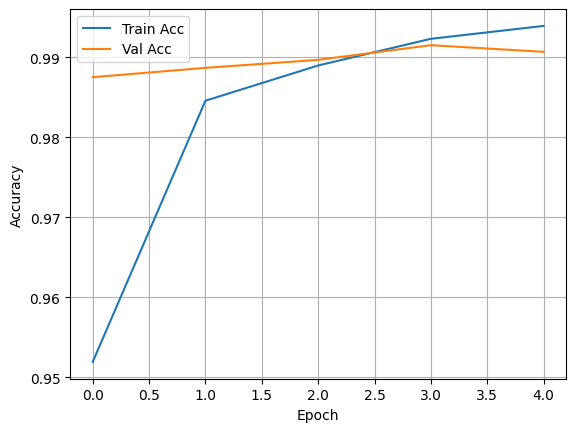

In [9]:
# Step 8 (Optional): Plot training curve
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()